In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
!pip install mlflow==2.21.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 110.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 132.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 88.7 MB/s eta 0:00:00


In [3]:
import mlflow

In [4]:
mlflow.set_tracking_uri(uri="http://mlflow:5000")

In [5]:
mlflow.autolog()

2025/04/14 20:59:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [7]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


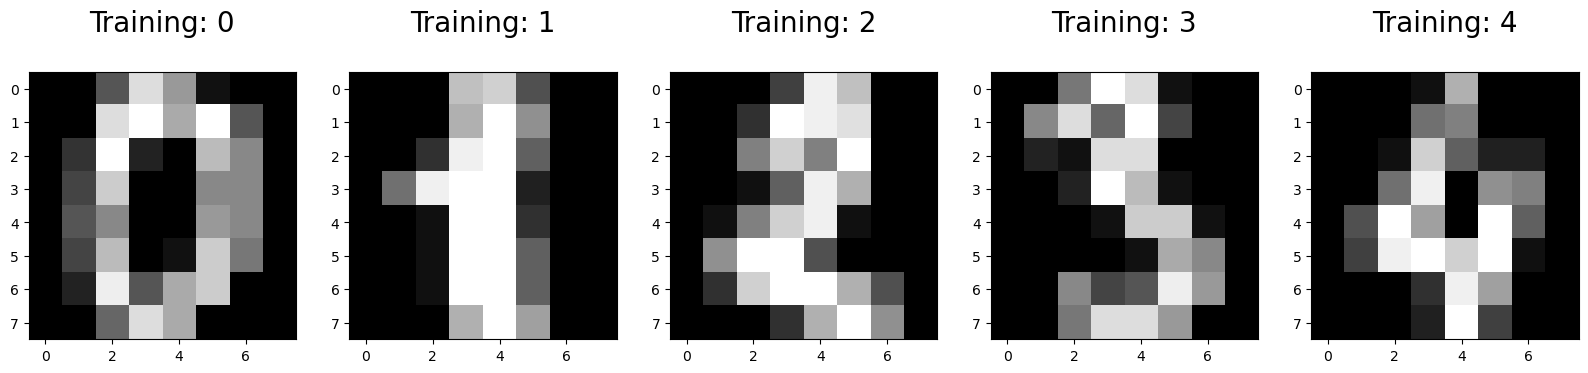

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(max_iter=1000)

In [12]:
logisticRegr.fit(x_train, y_train)

2025/04/14 20:59:59 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'bfb6f78f5e50432ea9650be5fb1f751f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run enthused-rat-516 at: http://mlflow:5000/#/experiments/0/runs/bfb6f78f5e50432ea9650be5fb1f751f
🧪 View experiment at: http://mlflow:5000/#/experiments/0


LogisticRegression(max_iter=1000)

In [13]:
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [14]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [15]:
predictions = logisticRegr.predict(x_test)

In [16]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

2025/04/14 21:00:54 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


In [18]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


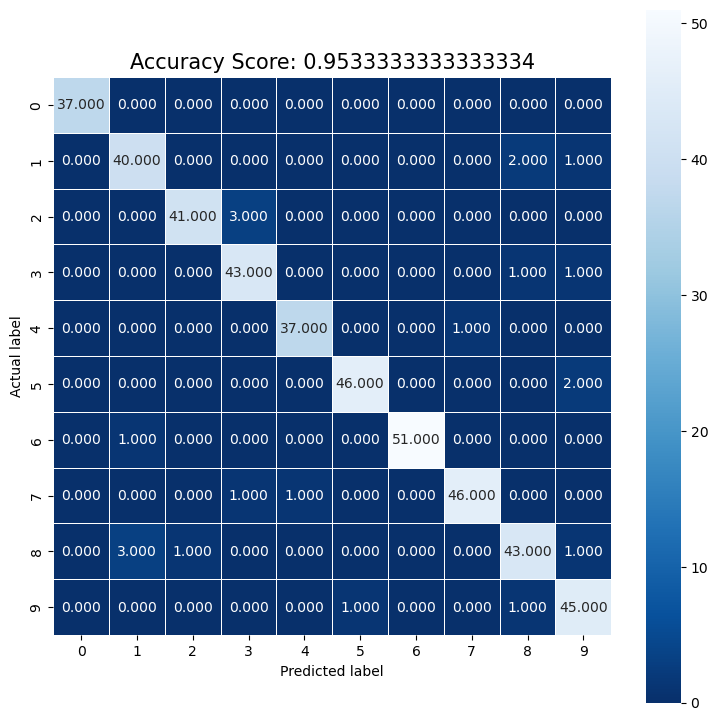

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);